## 회귀(regression)
- 머신러닝에서의 회귀 방법의 목적 : 연속된 실숫값을 정확히 예측하는 것
- 3장의 AND, OR, XOR 신경망이 출력을 정확하게 예측한 것도 회귀의 일종

## 선형 회귀(linear regression)
- 2개의 데이터에 대한 경향성 예측

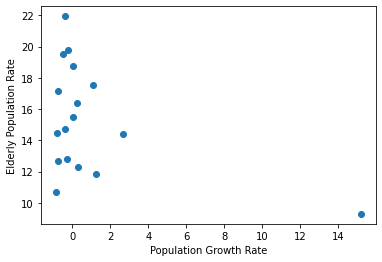

In [1]:
# 2018년 지역별 인구증가율, 고령인구비율
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
import matplotlib.pyplot as plt
plt.plot(population_inc, population_old, 'o')  # 점 그래프 그리기
plt.xlabel("Population Growth Rate")
plt.ylabel("Elderly Population Rate")
plt.show()

In [2]:
# 맨 오른쪽 밑 부분에 치우친 하나의 점
# 극단치(outlier)
# 일반적인 경향에서 벗어남
# 데이터의 일반적인 경향을 파악하기 위해 극단치 제거

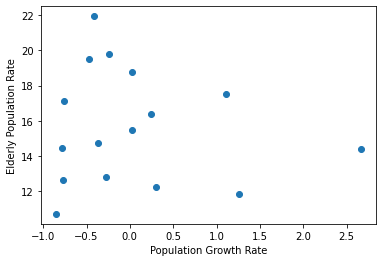

In [3]:
# 극단치 제거한 자료
import matplotlib.pyplot as plt
population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc, population_old, 'o')
plt.xlabel("Population Growth Rate")
plt.ylabel("Elderly Population Rate")
plt.show()
# 원래 데이터의 맨 오른쪽 아래의 극단치를 제거한 나머지 자료들의 산점도 그림이다.

In [4]:
# 선형 회귀
# 최소제곱법(Least Square Methond) : 잔차의 제곱을 최소화하는 알고리즘
# 잔차 : 선형식 - 데이터 (즉, 차이)

In [5]:
# X, Y의 평균 구하기
X = population_inc
Y = population_old
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

In [6]:
# 최소제곱법 사용하여 회귀계수 a, b 구하기
# Y = aX + b
# i = 1 ~ n까지의 Sxx, Sxy 총합을 구해야 하니까 list comprehension 사용
Sxy = sum([(x - x_bar)*(y - y_bar) for x, y in list(zip(X, Y))])  # 2개 이상의 리스트를 하나로 묶을 땐 : zip 사용
Sxx = sum([(x - x_bar)**2 for x in X])
a = Sxy / Sxx
b = y_bar - a * x_bar
print("a:", a, "b:", b)

a: -0.355834147915461 b: 15.669317743971302


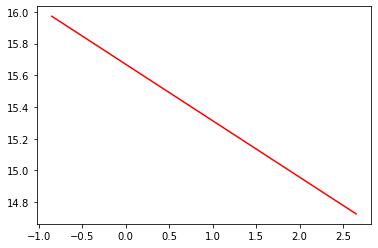

In [7]:
# 회귀선의 x축 데이터, y축 데이터 정리
# x축 데이터 : 원래 데이터의 최솟값 ~ 최댓값(0.01간격)
# y축 데이터 : 예측값(회귀선 따라서)
import numpy as np
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b
# 빨간선으로 회귀선 그리기
plt.plot(line_x, line_y, "r-")
plt.show()
# 회귀선에서의 데이터의 경향 : x값이 증가 -> y값은 감소
# 즉, 인구증가율 증가 -> 고령인구비율 감소
# 두 변수는 음의 상관관계에 있다.

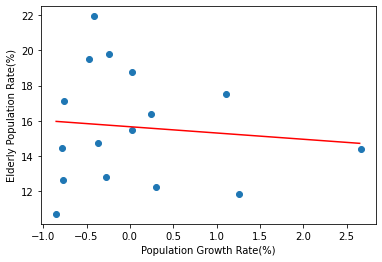

In [8]:
# 원래 데이터와 회귀선 같이 그리기
plt.plot(X, Y, "o")
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Population Rate(%)")
plt.plot(line_x, line_y, "r-")

plt.show()

In [9]:
# 지금까지는 최소제곱법 공식을 이용해서
# 회귀식을 일일히 구했다.
# 이번에는 tensorflow를 이용해서 회귀식을 구해보자.

## Tensorflow Linear Regression(텐서플로우 선형 회귀분석)
$$
y = ax + b
$$

- Cost Function(=Loss Function) : 비용함수, 손실함수
    - 실제 데이터, 회귀직선 사이의 오차
    - ex) MSE(잔차제곱의 합)

- Gradient Descent Algorithm(경사하강법 알고리즘)
    - 목적 :Cost Function을 최소로 만들자.
    - 미분해서 구하므로 미분가능한 함수여야 한다.
    - 데이터셋 값들을 반복 적용 -> a, b 파라미터를 더 정확하게 찾음
    - lr : 학습률 : 각 반복때마다 얼마나 크게 이동할 것인가
        - 너무 커버리면 : 최소값을 지나칠 수 있음
        - 너무 작아버리면 : 최소값에 다다르는데 오랜 시간(오랜 반복)이 필요


- 참조 : https://tensorflow.blog/2-텐서플로우-선형-회귀분석-first-contact-with-tensorflow/

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
X = population_inc
Y = population_old

# a, b를 난수로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
print(a.numpy(), b.numpy())

0.36413598 0.43453428


In [12]:
# 잔차의 제곱(SSE)의 평균(MSE)
def MSE():
    y_pred = a * X + b # 회귀선 위의 y hat
    mse = tf.reduce_mean((Y - y_pred) ** 2)
    return mse

# 위의 참조 링크에서는 경사하강법 사용
# 여기서는 Adam 옵티마이저 이용
# 다른 최적화 함수(optimizer)보다 Adam 의 성능이 뛰어나다.
# 가장 손실이 낮다.
optimizer = tf.optimizers.Adam(lr = 0.07)  # 학습률 : lr - 0.07
# 보통 학습률 : 0.0001 ~ 0.1 사이의 값을 사용

for i in range(1000):  # 학습 횟수 : 1000번
    # SSE를 최소화(minimize)
    optimizer.minimize(MSE, var_list=[a,b])
    # optimizer.minimize(최소화할 손실, var_list=학습시킬 변수 리스트)
    
    if i % 100 == 99:
        print(i, "a:", a.numpy(), "b:", b.numpy(), "loss:", MSE().numpy())

99 a: 0.114384934 b: 6.8087597 loss: 88.10818
199 a: -0.12266616 b: 11.277146 loss: 29.027225
299 a: -0.25978774 b: 13.860065 loss: 13.046604
399 a: -0.32342124 b: 15.058739 loss: 10.152746
499 a: -0.34691697 b: 15.501341 loss: 9.808955
599 a: -0.35384294 b: 15.631812 loss: 9.7822075
699 a: -0.35547647 b: 15.662576 loss: 9.7808485
799 a: -0.355783 b: 15.668356 loss: 9.780804
899 a: -0.3558281 b: 15.669211 loss: 9.780804
999 a: -0.35583338 b: 15.669302 loss: 9.780804


In [13]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 회귀선 위의 점 (line_x, line_y)

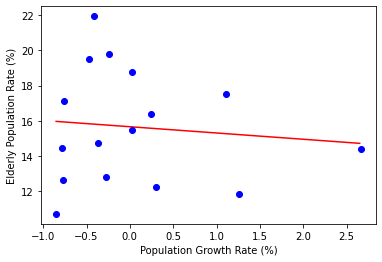

In [14]:
plt.plot(line_x, line_y, 'r-')  # 회귀선 : 빨강색 실선
plt.plot(X, Y, 'bo')  # 원래 데이터 : 파랑색 점
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

## 비선형 회귀
- 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀

## 다항 회귀
- $x^2, x^3$ 등의 다항식 이용
- 직선 대신 2차, 3차 함수 등의 곡선

In [15]:
# 4.5 Tensorflow 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

2차 함수 회귀선
$$
y=ax^2 + bx + c
$$

In [16]:
X = population_inc
Y = population_old

In [17]:
# (X,Y) 출력해보자
print(list(zip(X,Y)))

[(0.3, 12.27), (-0.78, 14.44), (1.26, 11.87), (0.03, 18.75), (1.11, 17.52), (0.24, 16.37), (-0.24, 19.78), (-0.47, 19.51), (-0.77, 12.65), (-0.37, 14.74), (-0.85, 10.72), (-0.41, 21.94), (-0.27, 12.83), (0.02, 15.51), (-0.76, 17.14), (2.66, 14.42)]


In [18]:
# 회귀계수 a, b, c를 난수로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

In [19]:
# MSE 함수 정의
def MSE():
    y_pred = a * X*X + b * X + c
    mse = tf.reduce_mean((Y-y_pred)**2)
    return mse

In [20]:
# Adam 알고리즘에 의한 손실 함수 최소화
optimizer = tf.keras.optimizers.Adam(lr = 0.07)
for i in range(1000):  # 학습 횟수 : 1000번
    optimizer.minimize(MSE, var_list = [a, b, c])
    # MSE를 최소화하자.
    # 학습시킬 변수 리스트 : 회귀계수 a, b, c의 리스트
    
    # 학습 1000번의 결과를 다 출력할 순 없으니까
    if i % 100 == 99:
        print(f"{i}번째 학습 결과, a: {a.numpy()}, b: {b.numpy()}, c: {c.numpy()}, loss:, {MSE().numpy()}")

99번째 학습 결과, a: 4.132130146026611, b: -6.105066299438477, c: 6.510487079620361, loss:, 68.02813720703125
199번째 학습 결과, a: 2.7728288173675537, b: -4.483090877532959, c: 10.319578170776367, loss:, 31.314640045166016
299번째 학습 결과, a: 1.2370762825012207, b: -2.2012856006622314, c: 12.975021362304688, loss:, 15.840108871459961
399번째 학습 결과, a: 0.28905680775642395, b: -0.7920986413955688, c: 14.616955757141113, loss:, 10.892219543457031
499번째 학습 결과, a: -0.20951831340789795, b: -0.05130384862422943, c: 15.482246398925781, loss:, 9.704710006713867
599번째 학습 결과, a: -0.43517422676086426, b: 0.28395602107048035, c: 15.874027252197266, loss:, 9.489152908325195
699번째 학습 결과, a: -0.5233697891235352, b: 0.41498881578445435, c: 16.027158737182617, loss:, 9.459467887878418
799번째 학습 결과, a: -0.5531815886497498, b: 0.4592781066894531, c: 16.07892417907715, loss:, 9.456369400024414
899번째 학습 결과, a: -0.5618834495544434, b: 0.4722074270248413, c: 16.094030380249023, loss:, 9.45612621307373
999번째 학습 결과, a: -0.564064

In [21]:
# 출력 결과를 보니
# 손실함수가 70.24 -> 9.46으로 많이 감소한 것을 알 수 있다.

In [22]:
# 이제 원래 데이터의 산점도,
# 학습을 통해 구한 2차 회귀식의 그림을 그려보자.

In [23]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x + b * line_x + c

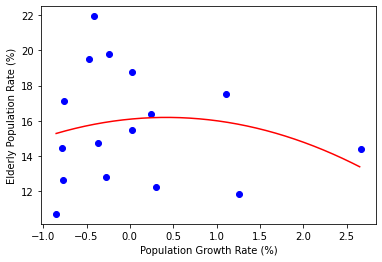

In [24]:
plt.plot(X, Y, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

In [25]:
# 아까 구한 1차 회귀선의 학습 999번째의 loss = 9.780804
# 이번에 구한 2차 회귀선의 학습 999번재의 loss = 9.456110000610352
# 2차 회귀선의 손실 함수값이 더 작다.

In [26]:
# 이번에는 3차 회귀선을 구해보자.

3차 회귀선
$$
y = ax^3 + bx^2 + cx + d
$$

In [27]:
# 4.6 Tensorflow 3차 회귀선 구하기
# 필요한 라이브러리 import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
# 원본 데이터
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

In [29]:
# 회귀계수 난수로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

In [30]:
# MSE
def MSE():
    y_pred = a * X*X*X + b * X*X + c * X + d
    mse = tf.reduce_mean((Y - y_pred)**2)
    return mse

In [31]:
# Adam algorithm을 이용한 손실함수 최소화
optimizer = tf.keras.optimizers.Adam(lr = 0.07)

for i in range(1000):
    optimizer.minimize(MSE, var_list = [a, b, c, d])
    
    if i % 100 == 99:
        print(f"{i}번째 학습 결과, a: {a.numpy()}, b: {b.numpy()}, c: {c.numpy()}, d: {d.numpy()}, loss:, {MSE().numpy()}")

99번째 학습 결과, a: -1.0525158643722534, b: 5.65403938293457, c: -4.067068099975586, d: 6.3764824867248535, loss:, 63.649444580078125
199번째 학습 결과, a: -1.8976529836654663, b: 6.640075206756592, c: -2.3872148990631104, d: 9.954224586486816, loss:, 30.580936431884766
299번째 학습 결과, a: -1.6529722213745117, b: 5.081335067749023, c: -0.9556794166564941, d: 12.11988639831543, loss:, 19.970550537109375
399번째 학습 결과, a: -0.9563999176025391, b: 2.856149911880493, c: -0.5446783900260925, d: 13.609243392944336, loss:, 14.276130676269531
499번째 학습 결과, a: -0.2612902522087097, b: 0.8205786347389221, c: -0.4476458728313446, d: 14.722131729125977, loss:, 11.004401206970215
599번째 학습 결과, a: 0.29367950558662415, b: -0.7780766487121582, c: -0.4146541655063629, d: 15.555678367614746, loss:, 9.303318977355957
699번째 학습 결과, a: 0.6963546276092529, b: -1.934648871421814, c: -0.39628365635871887, d: 16.15313148498535, loss:, 8.512638092041016
799번째 학습 결과, a: 0.9697615504264832, b: -2.7195117473602295, c: -0.38448470830917

In [32]:
# 3차 회귀선
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

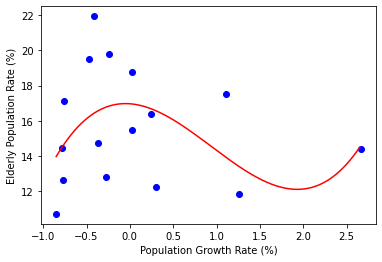

In [33]:
# 그래프 그리기
plt.plot(X, Y, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

In [34]:
# 3차 회귀선이 데이터를 잘 설명한다고 보기 어렵다.
# 이번에 구한 3차 회귀선의 학습 999번재의 loss = 8.023063659667969
# 3차 회귀선의 손실함수값이 제일 작게 나왔다.
# 왜지.... 질문하기....

In [35]:
# 3장의 AND, OR, XOR 연산을 하는 신경망 네트워크처럼 keras로도 딥러닝 신경망 네트워크를 만들 수 있다.

In [36]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 6,  # 레이어를 구성할 뉴런의 수  # 뉴런의 수가 많을수록 딥러닝 네트워크의 표현력이 좋아진다.
                                                                 # 하지만, 너무 많으면 학습이 제대로 안되거나, 과적합이 될 수 있음.
                         activation = "tanh",  # 사용할 활성화 함수
                         input_shape = (1,)),  # 형태 정보
    tf.keras.layers.Dense(units = 1)  # 레이어를 구성할 뉴런의 수  # x 입력값에 대한 하나의 y값만을 출력
])

In [37]:
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1),
             loss = "mse")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 4.7의 딥러닝 model
# 2개의 Dense layer로 구성
# 첫번째 Dense 레이어 - 활성화함수 : tanh -> 입력값 : 실수 / 출력값 : -1 ~ 1
#                    - 레이어를 구성할 뉴런의 수 : 6개
#                       - 뉴런이 많을수록 딥러닝 네트워크의 표현력이 좋아지지만, 너무 많으면 학습이 제대로 안되거나 과적합이 될 수 있음.
# 두번째 Dense 레이어 - 레이어를 구성할 뉴런의 수 : 1개
#                       - x 입력값에 대한 1개의 y값만을 출력해야하므로

# optimizer - loss : mse(평균제곱오차)

In [39]:
model.fit(X, Y, epochs = 10)  # 학습 수 : 10번

Epoch 1/10
1/1 [==============================] - 0s 997us/step - loss: 255.1680
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 105.6948
Epoch 3/10
1/1 [==============================] - 0s 988us/step - loss: 9.8249
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 9.7528
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 9.7266
Epoch 6/10
1/1 [==============================] - 0s 997us/step - loss: 9.7091
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 9.6968
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 9.6878
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 9.6805
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 9.6741


In [40]:
model.fit(X, Y, epochs = 1000)  # 학습 수 : 1000번

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.6678
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.6615
Epoch 3/1000
1/1 [==============================] - 0s 998us/step - loss: 9.6549
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 9.6478
Epoch 5/1000
1/1 [==============================] - 0s 998us/step - loss: 9.6401
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.6317
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 9.6226
Epoch 8/1000
1/1 [==============================] - 0s 997us/step - loss: 9.6127
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.6018
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.5900
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.5770
Epoch 12/1000
1/1 [==============================] - 0s 998us/step - loss: 9.5628
Epoch 13/1000
1/1 [======================

In [41]:
# 손실함수값이 6.3 근방이다.
# 손실에 거의 변화가 없으면 -> 학습이 거의 다 된 것이다.

In [42]:
# 딥러닝을 포함한 머신러닝에서는 충분히 학습 -> 학습 종료
# 그렇지 않으면, 학습데이터에 과적합
# 현재 데이터의 경향성은 지나치게 잘 반영
# 그러나, 새로운 데이터에는 잘 안 맞을 수 있음

# 학습을 언제 멈출지 결정하는 데 좋은 판단 기준 : 학습 데이터 / 검증 데이터를 설정하는 것

In [43]:
model.predict(X)

array([[15.276482],
       [15.278969],
       [14.639395],
       [16.289778],
       [14.654186],
       [15.441763],
       [17.755209],
       [18.695372],
       [15.674734],
       [18.359877],
       [12.512136],
       [18.510584],
       [17.907867],
       [16.34006 ],
       [16.05279 ],
       [14.528059]], dtype=float32)

In [44]:
# 학습이 끝나면
# 입력값을 입력했을 때 딥러닝 네트워크가 어떤 값을 예측하는 지 확인해야 한다.

# 거의 15 부근의 값을 출력하는 것처럼 보인다.
# 학습이 잘 된 것인지 확인하는 법 -> 그래프를 그려본다.

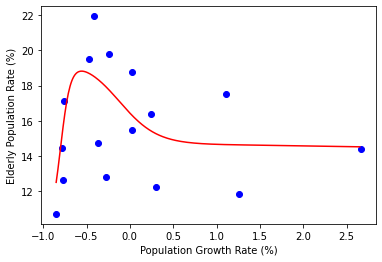

In [45]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(X, Y, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

In [46]:
# 딥러닝 네트워크를 이용해 회귀선을 예측한 그래프를 보고
# 직접 회귀계수를 추정한 1,2,3차 회귀선 중 어느 그래프와 제일 비슷하게 생겼는 지 유추 가능

## 보스턴 주택 가격 데이터셋

In [47]:
# 딥러닝 네트워크를 이용한 회귀
# 보스턴 주택 가격 데이터셋을 이용 -> 주택 가격 예측 네트워크를 만들어보자.

In [48]:
# data 정보
# 보스턴 주택 가격 데이터셋
# 1978년 미국 보스턴 지역의 주택 가격
# X : 범죄율, 주택당 방 갯수, 고속도로까지의 거리 등 13가지 데이터
# Y : 506개 타운의 주택 가격 중앙값

In [49]:
from tensorflow.keras.datasets import boston_housing

In [50]:
boston_housing

<module 'tensorflow.keras.datasets.boston_housing' from 'C:\\Users\\geunho\\AppData\\Roaming\\Python\\Python37\\site-packages\\tensorflow\\keras\\datasets\\boston_housing\\__init__.py'>